# Statistical Analysis of Student Insomnia and Educational Outcomes

This notebook performs comprehensive statistical analysis on the student insomnia dataset to understand the relationships between sleep patterns and educational outcomes.

In [23]:
# %pip install pandas numpy scipy seaborn matplotlib statsmodels

## 1. Load and Prepare Data

First, let's import the required libraries and load our dataset.

In [24]:
# Import required libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')  # Using default style instead of seaborn
sns.set_theme()  # This will set the seaborn styling
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('insomnia_out/clean_dataset.csv')

# Display basic information about the dataset
print("Dataset Info:")
print("-" * 50)
print(df.info())
print("\nFirst few rows of the dataset:")
print("-" * 50)
display(df.head())
print("\nBasic statistics of numerical columns:")
print("-" * 50)
display(df.describe())

Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             996 non-null    object 
 1   year                  996 non-null    object 
 2   gender                996 non-null    object 
 3   sleep_hours_band      996 non-null    object 
 4   sleep_quality         996 non-null    object 
 5   stress                996 non-null    object 
 6   academic_performance  996 non-null    object 
 7   sleep_hours           996 non-null    float64
 8   sleep_quality_ord     996 non-null    int64  
 9   stress_ord            996 non-null    int64  
 10  acad_perf_ord         996 non-null    int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 85.7+ KB
None

First few rows of the dataset:
--------------------------------------------------


,timestamp,year,gender,sleep_hours_band,sleep_quality,stress,academic_performance,sleep_hours,sleep_quality_ord,stress_ord,acad_perf_ord
0,10/24/2024 16:51:15,Graduate student,Male,7-8 hours,Good,High stress,Average,7.5,4,3,3
1,10/24/2024 16:51:51,Third year,Male,7-8 hours,Good,Low stress,Good,7.5,4,2,4
2,10/24/2024 16:52:21,First year,Female,7-8 hours,Good,High stress,Below Average,7.5,4,3,2
3,10/24/2024 16:53:00,Third year,Male,More than 8 hours,Poor,Extremely high stress,Excellent,8.5,2,4,5
4,10/24/2024 16:53:25,Graduate student,Male,7-8 hours,Very good,Low stress,Average,7.5,5,2,3



Basic statistics of numerical columns:
--------------------------------------------------


,sleep_hours,sleep_quality_ord,stress_ord,acad_perf_ord
count,996.000000,996.000000,996.000000,996.000000
mean,7.705823,2.969880,3.406627,1.677711
std,0.911571,1.598711,0.659158,0.831264
min,3.500000,1.000000,1.000000,1.000000
25%,7.500000,1.000000,3.000000,1.000000
50%,7.500000,3.000000,3.000000,2.000000
75%,8.500000,5.000000,4.000000,2.000000
max,8.500000,5.000000,4.000000,5.000000


In [25]:
# Check the column names in our dataset
print("Column names in the dataset:")
print("-" * 50)
print(df.columns.tolist())

# Display first few rows to understand the data structure
print("\nFirst few rows of the dataset:")
print("-" * 50)
display(df.head())

Column names in the dataset:
--------------------------------------------------
['timestamp', 'year', 'gender', 'sleep_hours_band', 'sleep_quality', 'stress', 'academic_performance', 'sleep_hours', 'sleep_quality_ord', 'stress_ord', 'acad_perf_ord']

First few rows of the dataset:
--------------------------------------------------


,timestamp,year,gender,sleep_hours_band,sleep_quality,stress,academic_performance,sleep_hours,sleep_quality_ord,stress_ord,acad_perf_ord
0,10/24/2024 16:51:15,Graduate student,Male,7-8 hours,Good,High stress,Average,7.5,4,3,3
1,10/24/2024 16:51:51,Third year,Male,7-8 hours,Good,Low stress,Good,7.5,4,2,4
2,10/24/2024 16:52:21,First year,Female,7-8 hours,Good,High stress,Below Average,7.5,4,3,2
3,10/24/2024 16:53:00,Third year,Male,More than 8 hours,Poor,Extremely high stress,Excellent,8.5,2,4,5
4,10/24/2024 16:53:25,Graduate student,Male,7-8 hours,Very good,Low stress,Average,7.5,5,2,3


## 2. Normality Testing

Let's test whether our key numerical variables follow a normal distribution. We'll use:
1. Shapiro-Wilk test
2. Q-Q plots
3. Distribution plots

Shapiro-Wilk test results for sleep_hours:
Statistic: 0.6819
P-value: 0.0000
Is normally distributed? False



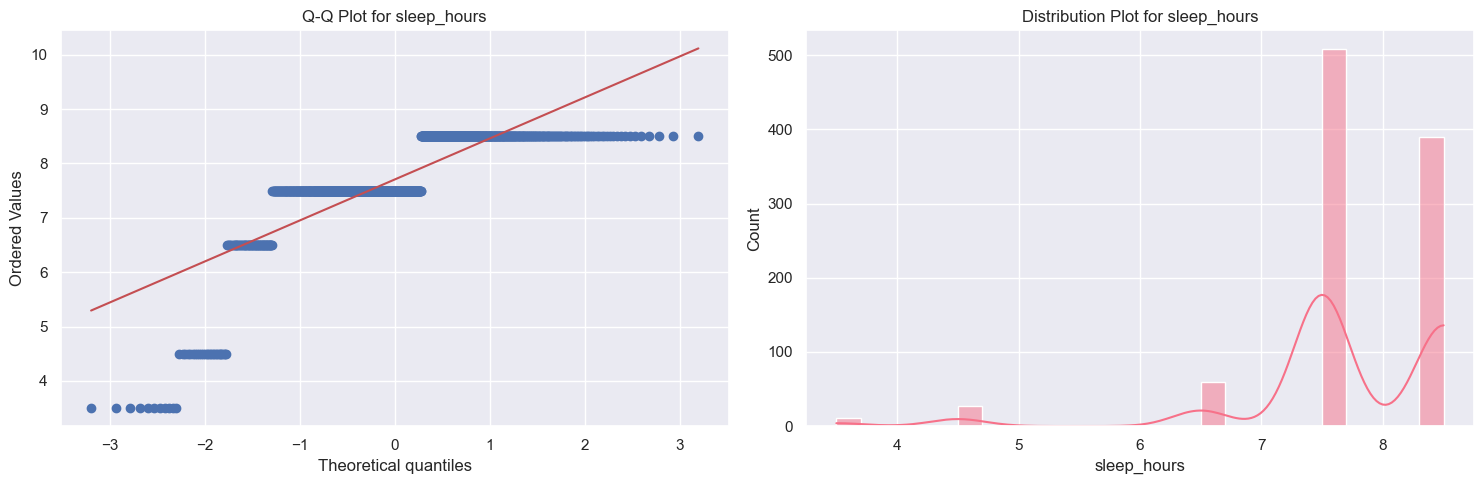

Shapiro-Wilk test results for sleep_quality_ord:
Statistic: 0.8306
P-value: 0.0000
Is normally distributed? False



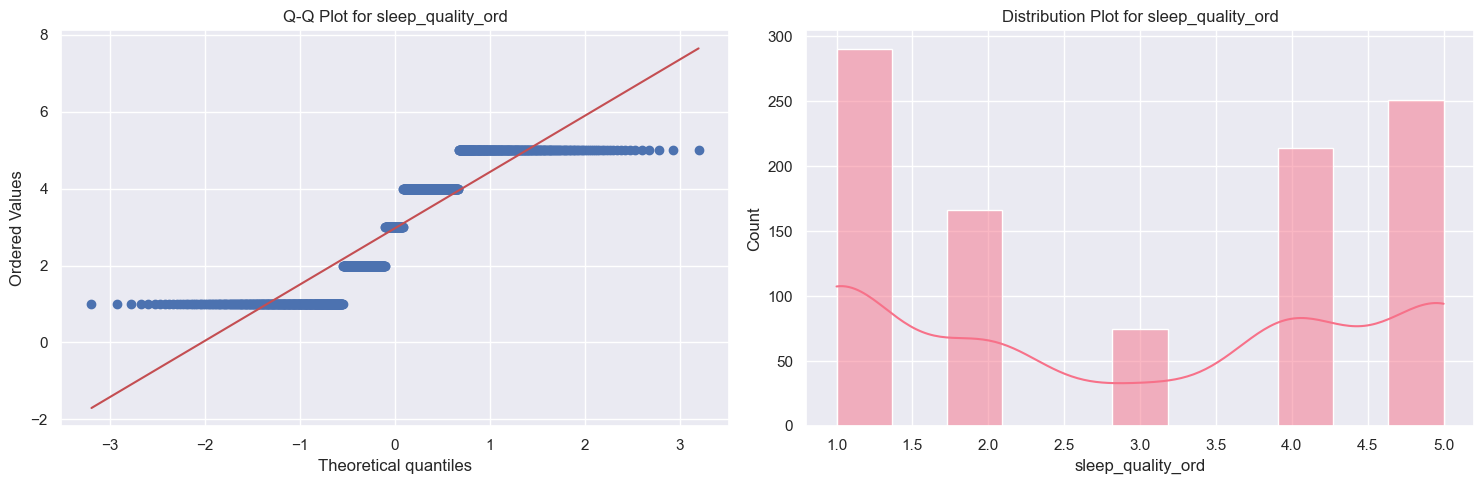

Shapiro-Wilk test results for stress_ord:
Statistic: 0.7445
P-value: 0.0000
Is normally distributed? False



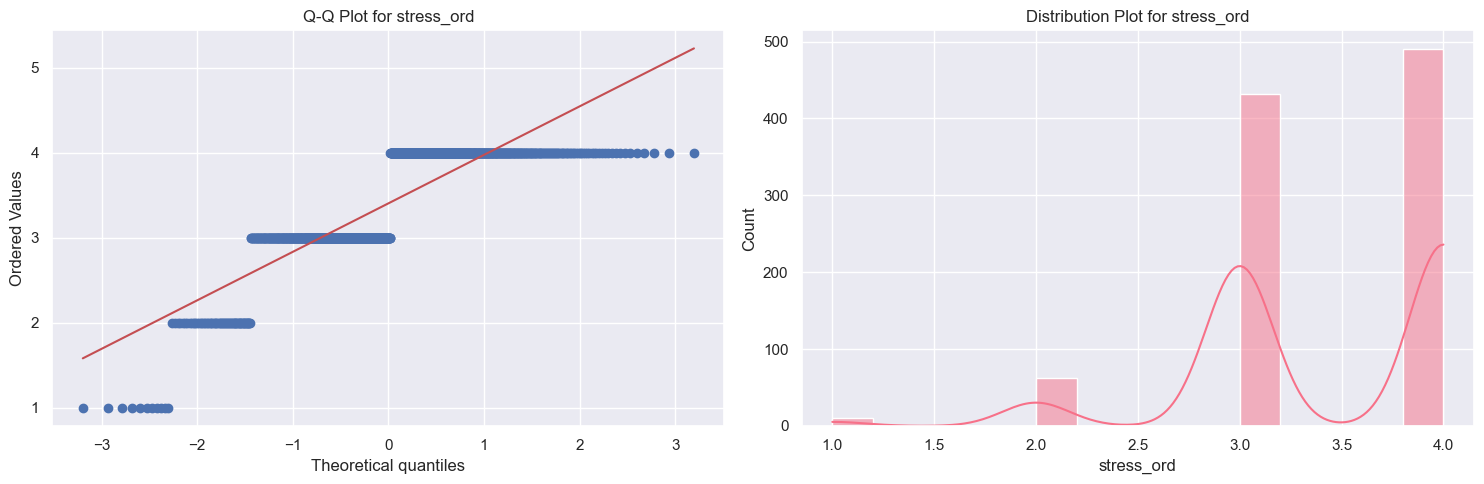

Shapiro-Wilk test results for acad_perf_ord:
Statistic: 0.7415
P-value: 0.0000
Is normally distributed? False



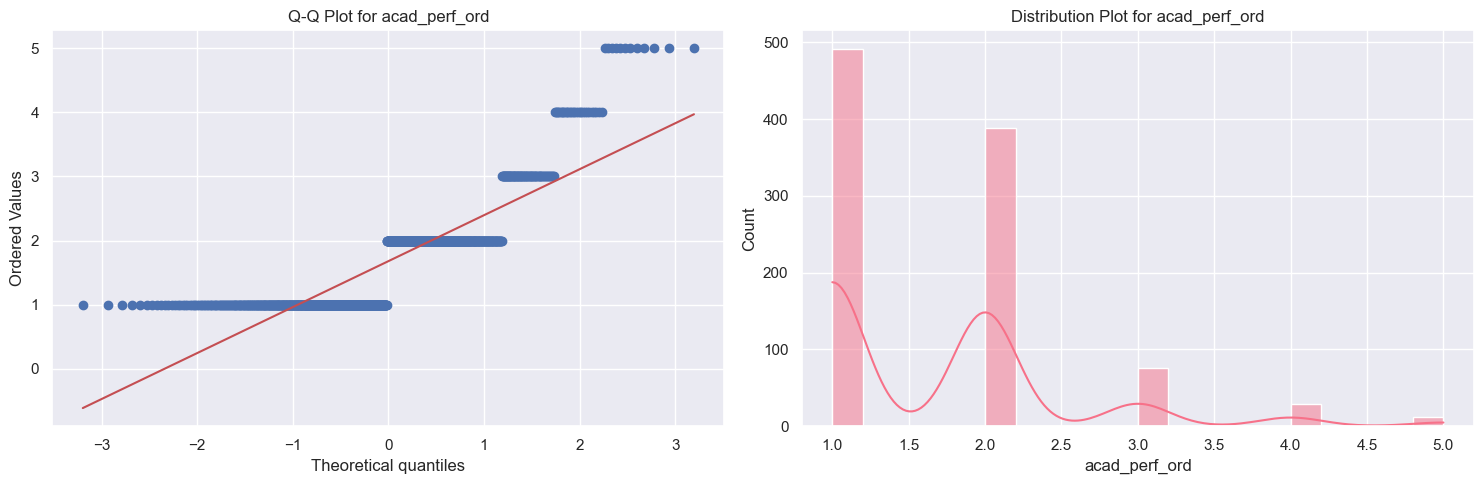

In [26]:
# Function to perform normality test
def test_normality(data, var_name):
    stat, p_value = stats.shapiro(data)
    print(f"Shapiro-Wilk test results for {var_name}:")
    print(f"Statistic: {stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Is normally distributed? {p_value > 0.05}\n")
    
    # Create Q-Q plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Q-Q plot
    stats.probplot(data, dist="norm", plot=ax1)
    ax1.set_title(f"Q-Q Plot for {var_name}")
    
    # Distribution plot
    sns.histplot(data=data, kde=True, ax=ax2)
    ax2.set_title(f"Distribution Plot for {var_name}")
    plt.tight_layout()
    plt.show()

# Test normality for relevant numerical variables
numerical_vars = ['sleep_hours', 'sleep_quality_ord', 'stress_ord', 'acad_perf_ord']

for var in numerical_vars:
    if var in df.columns:
        test_normality(df[var], var)

## 3. Correlation Analysis

Let's analyze the correlations between numerical variables in our dataset to understand their relationships.

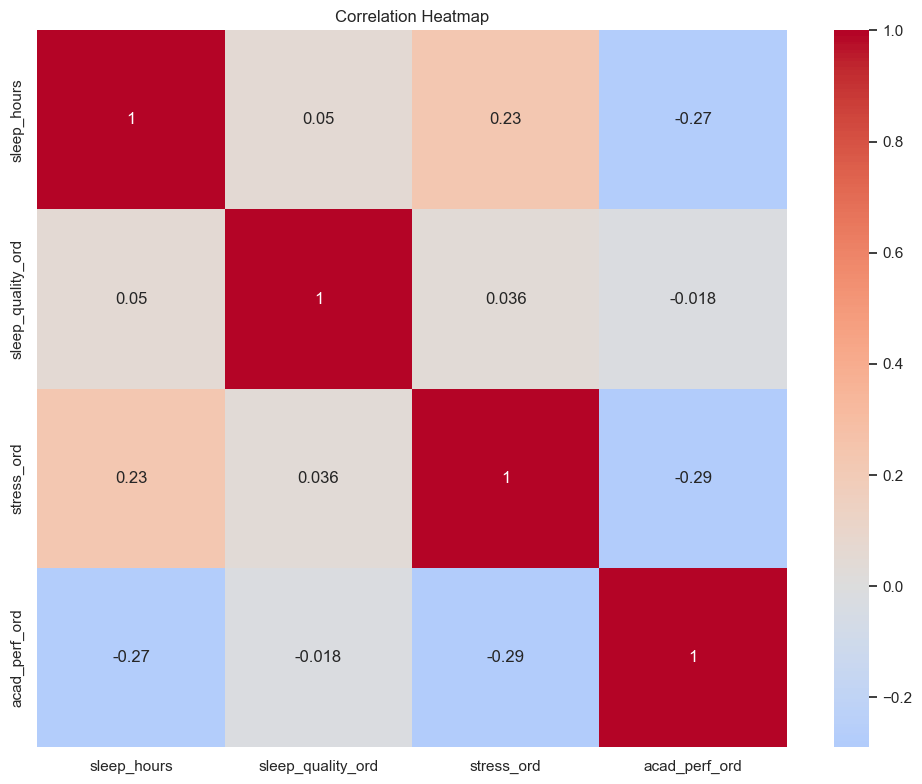


Spearman Correlation Matrix:
--------------------------------------------------


,sleep_hours,sleep_quality_ord,stress_ord,acad_perf_ord
sleep_hours,1.000000,0.072440,0.201318,-0.175700
sleep_quality_ord,0.072440,1.000000,0.069079,-0.033469
stress_ord,0.201318,0.069079,1.000000,-0.220941
acad_perf_ord,-0.175700,-0.033469,-0.220941,1.000000



Significant Correlations (p < 0.05):
--------------------------------------------------
sleep_hours vs stress_ord:
Correlation: 0.2252
P-value: 0.0000

sleep_hours vs acad_perf_ord:
Correlation: -0.2745
P-value: 0.0000

stress_ord vs acad_perf_ord:
Correlation: -0.2888
P-value: 0.0000



In [27]:
# Calculate correlation matrix
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Calculate and display Spearman correlation (for non-normal distributions)
spearman_corr = df[numerical_cols].corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print("-" * 50)
display(spearman_corr)

# Test for significant correlations
def test_correlation_significance(x, y):
    correlation, p_value = stats.pearsonr(x, y)
    return correlation, p_value

# Print significant correlations
print("\nSignificant Correlations (p < 0.05):")
print("-" * 50)
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        corr, p_val = test_correlation_significance(
            df[numerical_cols[i]], 
            df[numerical_cols[j]]
        )
        if p_val < 0.05:
            print(f"{numerical_cols[i]} vs {numerical_cols[j]}:")
            print(f"Correlation: {corr:.4f}")
            print(f"P-value: {p_val:.4f}\n")

## 4. T-Test Analysis

Let's perform t-tests to compare means between different groups in our dataset. We'll focus on:
1. GPA differences between students with high vs. low insomnia scores
2. Study hours differences between insomnia severity groups

Comparing Academic Performance between Good and Poor Sleep Quality groups:
--------------------------------------------------
T-test results for Academic Performance:
T-statistic: -0.6129
P-value: 0.5401
Cohen's d: -0.0404
Effect size interpretation: Very small



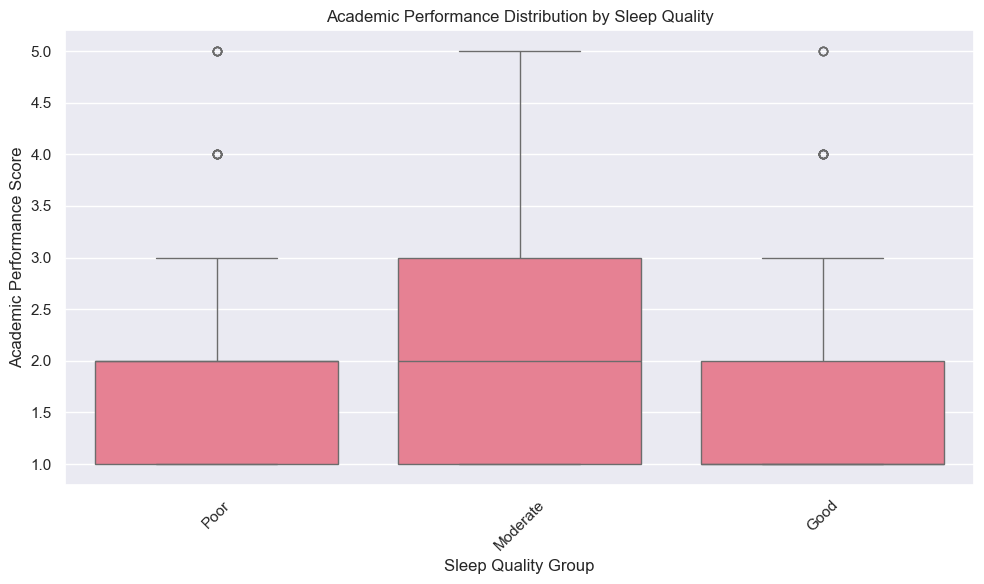


Comparing Stress Levels between Sleep Quality groups:
--------------------------------------------------
Poor vs Moderate:
T-test results for Stress Levels:
T-statistic: 4.7380
P-value: 0.0000
Cohen's d: 0.5904
Effect size interpretation: Medium

Poor vs Good:
T-test results for Stress Levels:
T-statistic: -0.7687
P-value: 0.4423
Cohen's d: -0.0507
Effect size interpretation: Very small



In [28]:
# Create sleep quality groups
df['Sleep_Quality_Group'] = pd.cut(df['sleep_quality_ord'], 
                                bins=[0, 2, 3, 5],
                                labels=['Poor', 'Moderate', 'Good'])

# Function to perform t-test analysis
def perform_ttest(group1, group2, var_name):
    stat, p_value = stats.ttest_ind(group1, group2)
    # Calculate Cohen's d for effect size
    cohens_d = (np.mean(group1) - np.mean(group2)) / np.sqrt(
        ((len(group1) - 1) * np.std(group1, ddof=1) ** 2 + 
         (len(group2) - 1) * np.std(group2, ddof=1) ** 2) / 
        (len(group1) + len(group2) - 2))
    
    print(f"T-test results for {var_name}:")
    print(f"T-statistic: {stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Cohen's d: {cohens_d:.4f}")
    print(f"Effect size interpretation: {interpret_cohens_d(cohens_d)}\n")
    
    return stat, p_value, cohens_d

def interpret_cohens_d(d):
    d = abs(d)
    if d < 0.2: return "Very small"
    elif d < 0.5: return "Small"
    elif d < 0.8: return "Medium"
    else: return "Large"

# Compare academic performance between good and poor sleep quality groups
good_sleep = df[df['sleep_quality_ord'] >= 4]['acad_perf_ord']
poor_sleep = df[df['sleep_quality_ord'] <= 2]['acad_perf_ord']

print("Comparing Academic Performance between Good and Poor Sleep Quality groups:")
print("-" * 50)
perform_ttest(good_sleep, poor_sleep, "Academic Performance")

# Visualize academic performance distribution by sleep quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep_Quality_Group', y='acad_perf_ord', data=df)
plt.title('Academic Performance Distribution by Sleep Quality')
plt.xlabel('Sleep Quality Group')
plt.ylabel('Academic Performance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Compare stress levels between different sleep quality groups
print("\nComparing Stress Levels between Sleep Quality groups:")
print("-" * 50)
for quality in ['Moderate', 'Good']:
    group1 = df[df['Sleep_Quality_Group'] == 'Poor']['stress_ord']
    group2 = df[df['Sleep_Quality_Group'] == quality]['stress_ord']
    print(f"Poor vs {quality}:")
    perform_ttest(group1, group2, f"Stress Levels")

## 5. ANOVA Testing

Let's perform one-way ANOVA to compare means across multiple insomnia severity groups and conduct post-hoc tests if significant differences are found.

One-way ANOVA results for Academic Performance:
F-statistic: 22.3804
P-value: 0.0000
Significant differences found? True

Tukey's HSD test results:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
    Good Moderate   0.6671    0.0  0.4294  0.9048   True
    Good     Poor   0.0318 0.8237 -0.0941  0.1577  False
Moderate     Poor  -0.6353    0.0 -0.8733 -0.3972   True
--------------------------------------------------------

Effect size (Eta-squared): 0.0431
Effect size interpretation:
< 0.01: Very small
0.01-0.06: Small
0.06-0.14: Medium
> 0.14: Large

Tukey's HSD test results:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
    Good Moderate   0.6671    0.0  0.4294  0.9048   True
    Good     Poor   0.0318 0.8237 -0.0941  0.1577  False
Moderate  

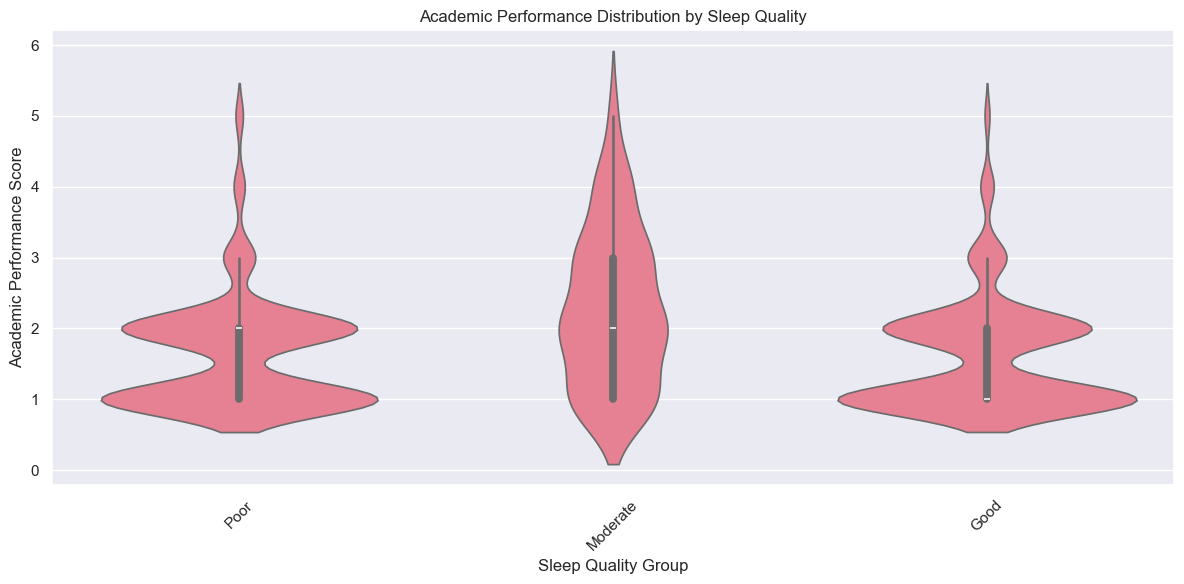

One-way ANOVA results for Stress Levels:
F-statistic: 12.2029
P-value: 0.0000
Significant differences found? True

Tukey's HSD test results:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
    Good Moderate  -0.3983    0.0 -0.5887 -0.2079   True
    Good     Poor  -0.0328 0.7262 -0.1336  0.0681  False
Moderate     Poor   0.3655    0.0  0.1749  0.5562   True
--------------------------------------------------------

Effect size (Eta-squared): 0.0240
Effect size interpretation:
< 0.01: Very small
0.01-0.06: Small
0.06-0.14: Medium
> 0.14: Large

Tukey's HSD test results:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
    Good Moderate  -0.3983    0.0 -0.5887 -0.2079   True
    Good     Poor  -0.0328 0.7262 -0.1336  0.0681  False
Moderate     Poor

In [29]:
# Perform one-way ANOVA for academic performance across sleep quality groups
def perform_anova(data, groups, var_name):
    # Prepare groups for ANOVA
    group_data = [group for group in data]
    
    # Perform one-way ANOVA
    f_stat, p_value = stats.f_oneway(*group_data)
    
    print(f"One-way ANOVA results for {var_name}:")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Significant differences found? {p_value < 0.05}\n")
    
    if p_value < 0.05:
        # Perform Tukey's HSD test
        all_data = np.concatenate(group_data)
        all_groups = np.concatenate([[group] * len(data) for group, data in zip(groups, group_data)])
        
        tukey = pairwise_tukeyhsd(all_data, all_groups)
        print("Tukey's HSD test results:")
        print(tukey)
        
        # Calculate effect size (Eta-squared)
        groups_array = [np.array(g) for g in group_data]
        grand_mean = np.mean(np.concatenate(groups_array))
        ss_total = sum(sum((x - grand_mean) ** 2) for x in groups_array)
        ss_between = sum(len(g) * (np.mean(g) - grand_mean) ** 2 for g in groups_array)
        eta_squared = ss_between / ss_total
        
        print(f"\nEffect size (Eta-squared): {eta_squared:.4f}")
        print("Effect size interpretation:")
        print("< 0.01: Very small")
        print("0.01-0.06: Small")
        print("0.06-0.14: Medium")
        print("> 0.14: Large\n")

# Perform ANOVA for Academic Performance
academic_groups = [df[df['Sleep_Quality_Group'] == quality]['acad_perf_ord'] 
                  for quality in ['Poor', 'Moderate', 'Good']]
perform_anova(academic_groups, ['Poor', 'Moderate', 'Good'], 'Academic Performance')

# Visualize the relationships
plt.figure(figsize=(12, 6))
sns.violinplot(x='Sleep_Quality_Group', y='acad_perf_ord', data=df)
plt.title('Academic Performance Distribution by Sleep Quality')
plt.xlabel('Sleep Quality Group')
plt.ylabel('Academic Performance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Perform ANOVA for Stress Levels
stress_groups = [df[df['Sleep_Quality_Group'] == quality]['stress_ord'] 
                for quality in ['Poor', 'Moderate', 'Good']]
perform_anova(stress_groups, ['Poor', 'Moderate', 'Good'], 'Stress Levels')

## 6. Chi-Square Test of Independence

Let's examine the relationship between categorical variables in our dataset using chi-square tests.

Chi-square test results for Sleep_Quality_Group vs Academic_Category:
--------------------------------------------------
Contingency Table:
Academic_Category    High  Low  Medium
Sleep_Quality_Group                   
Poor                   15  415      26
Moderate               11   46      18
Good                   15  418      32

Test Statistics:
Chi-square statistic: 57.5282
P-value: 0.0000
Degrees of freedom: 4
Cramer's V: 0.1699
Association strength: Weak



<Figure size 1000x600 with 0 Axes>

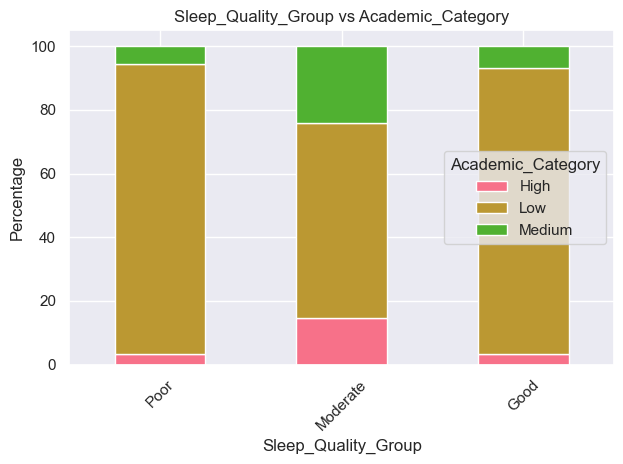

Chi-square test results for Sleep_Quality_Group vs Stress_Category:
--------------------------------------------------
Contingency Table:
Stress_Category      High  Low
Sleep_Quality_Group           
Poor                  439   17
Moderate               58   17
Good                  425   40

Test Statistics:
Chi-square statistic: 35.3311
P-value: 0.0000
Degrees of freedom: 2
Cramer's V: 0.1883
Association strength: Weak



<Figure size 1000x600 with 0 Axes>

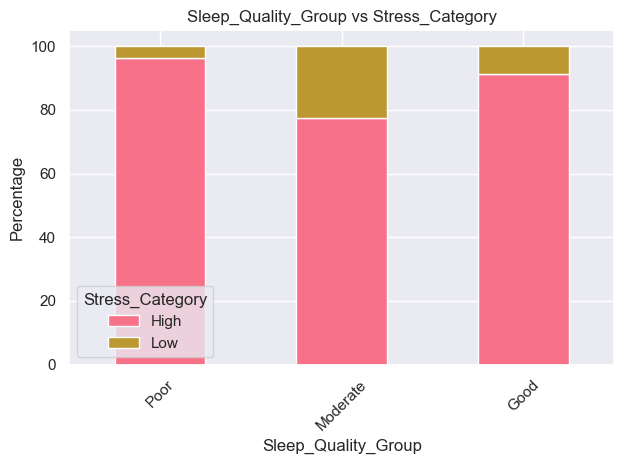

Chi-square test results for Stress_Category vs Academic_Category:
--------------------------------------------------
Contingency Table:
Academic_Category  High  Low  Medium
Stress_Category                     
High                 22  839      61
Low                  19   40      15

Test Statistics:
Chi-square statistic: 117.5923
P-value: 0.0000
Degrees of freedom: 2
Cramer's V: 0.3436
Association strength: Strong



<Figure size 1000x600 with 0 Axes>

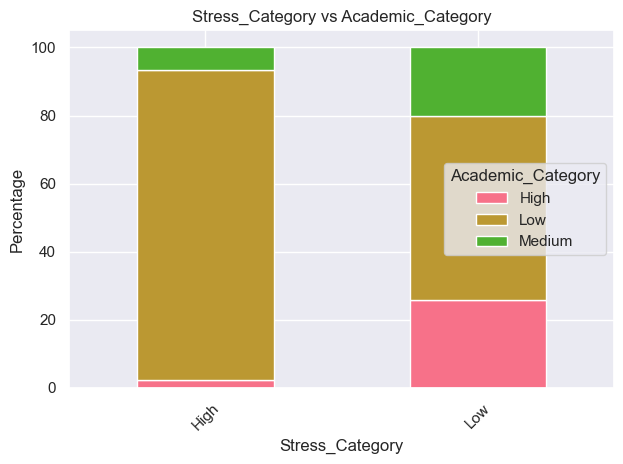

In [30]:
# Function to perform chi-square test
def perform_chi_square(var1, var2, df):
    # Create contingency table
    contingency = pd.crosstab(df[var1], df[var2])
    
    # Perform chi-square test
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency)
    
    # Calculate Cramer's V
    n = contingency.sum().sum()
    min_dim = min(contingency.shape) - 1
    cramer_v = np.sqrt(chi2 / (n * min_dim))
    
    print(f"Chi-square test results for {var1} vs {var2}:")
    print("-" * 50)
    print("Contingency Table:")
    print(contingency)
    print("\nTest Statistics:")
    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Degrees of freedom: {dof}")
    print(f"Cramer's V: {cramer_v:.4f}")
    print(f"Association strength: {interpret_cramers_v(cramer_v)}\n")
    
    # Visualize the relationship
    plt.figure(figsize=(10, 6))
    contingency_pct = contingency.div(contingency.sum(axis=1), axis=0) * 100
    contingency_pct.plot(kind='bar', stacked=True)
    plt.title(f'{var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel('Percentage')
    plt.legend(title=var2)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def interpret_cramers_v(v):
    if v < 0.1: return "Very weak"
    elif v < 0.2: return "Weak"
    elif v < 0.3: return "Moderate"
    else: return "Strong"

# Map ordinal values to categories
df['Academic_Category'] = df['academic_performance'].map({
    'Poor': 'Low',
    'Below Average': 'Low',
    'Average': 'Medium',
    'Good': 'High',
    'Excellent': 'High'
})

df['Stress_Category'] = df['stress'].map({
    'No stress': 'Low',
    'Low stress': 'Low',
    'Moderate stress': 'Medium',
    'High stress': 'High',
    'Extremely high stress': 'High'
})

# Perform chi-square tests using original categories
perform_chi_square('Sleep_Quality_Group', 'Academic_Category', df)
perform_chi_square('Sleep_Quality_Group', 'Stress_Category', df)
perform_chi_square('Stress_Category', 'Academic_Category', df)

## Summary of Statistical Analysis

This notebook has performed a comprehensive statistical analysis of the relationship between student insomnia and educational outcomes. The analysis included:

1. Normality testing of key variables
2. Correlation analysis between numerical variables
3. T-tests comparing means between different insomnia severity groups
4. ANOVA testing to compare means across multiple groups
5. Chi-square tests to examine relationships between categorical variables

The results can be used to understand the impact of insomnia on academic performance and identify potential interventions to support students with sleep issues.